# Toxic Comment Classification  
    I am going to work on this project following the CRISP-DM process, which appears to be the most widely used process model for intelligent data analysis.
## Project understanding
    1. What exactlty is the problem, the expected benefit?
    The task is to detect different types of of toxicity like threats, obscenity, insults, and identity-based hate.This model later can be used to make online environment safer and bully-free.
    2. What should a solution look like?
    As the test set, with a predicted probability for each of the six possible types of comment toxicity.
    
## Data understanding
    1. What data do I have available?
    I am provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. 
    The types of toxicity are:
        toxic
        severe_toxic
        obscene
        threat
        insult
        identity_hate


## Data preparation
    1. Which data should I concentrate on?
    2. How is the data best transformed for modeling?
    3. How may we increase the data quality?
## Modeling
    1. What kind of model architecture suits the problem best?
    2. What is the best method to get the model?
    3. How well does the model perform technically?
## Evaluation
    1. How good is the model?(Kaggle score + evaluation techniques)

# Data preparation and Visualization
1. Which data should I concentrate on?
2. How is the data best transformed for modeling?
3. How may we increase the data quality?
    Using statistical analysis to understand how variables in a dataset relate to each other and how those relationships depend     on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [2]:
comments_data = pd.read_csv(r'C:\Users\zorya\Desktop\DS\toxic_KAGGLE\train.csv')
comments_data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
comments_data['comment_text'] = comments_data['comment_text'].str.lower()
comments_data.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [4]:
comments_data.shape

(159571, 8)

    Number of rows in our dataset:    159571
    Number of columns in our dataset:      8
    

In [5]:
comments_data.astype(bool).sum(axis=0)

id               159571
comment_text     159571
toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
dtype: int64

    Above we can see ammount of comments in each category.

In [6]:
toxic = comments_data [~( comments_data [ ['toxic'  ,'severe_toxic' ,  'obscene' , 'threat' ,'insult','identity_hate' ] ] == 0).all(axis=1) ]
toxic.shape

(16225, 8)

    Number of toxic comments in our dataset:      16225
    Number of non toxic comments in our dataset: 143346

In [7]:
comments_data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

    We can see that our dataset does not contain any NaN values.

In [8]:
multi_comments = comments_data.iloc[:, 2:].sum(axis=1)
multi_comments = multi_comments.value_counts()
multi_comments

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

    Amount of comments that are in multiple categories can be see above.

### Visualizing ammount of comments in each category

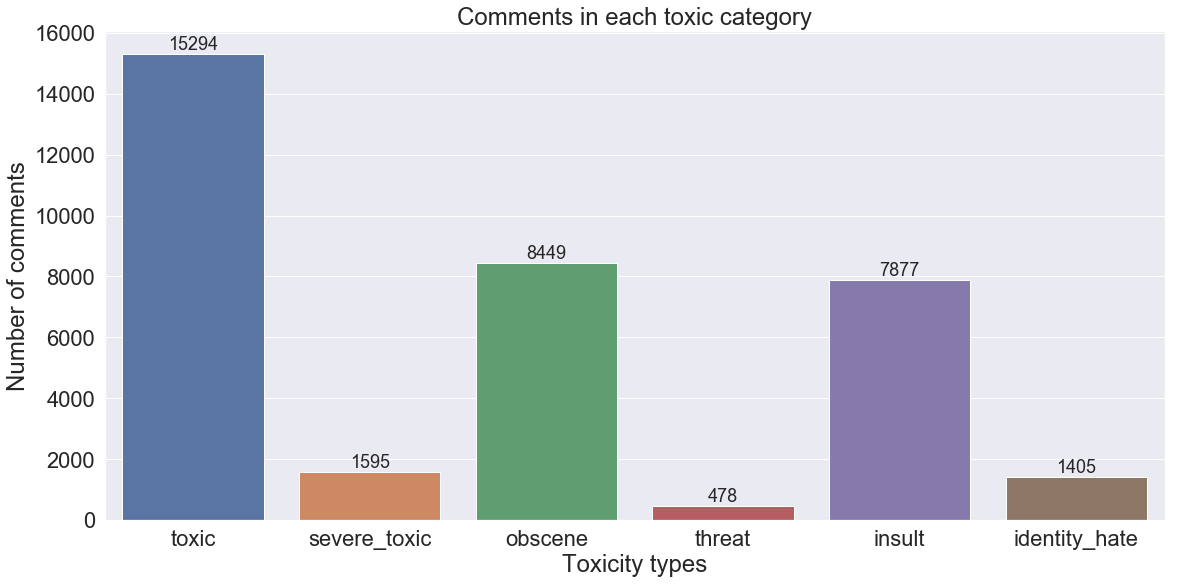

In [9]:
toxicity_types = list(comments_data.iloc[:0,2:])
y_comments = comments_data.iloc[:, [2,3,4,5,6,7]].sum().values

sns.set(font_scale = 2)
sns.set_style("darkgrid")
plt.figure(figsize=(19,9))
plt.ylabel("Number of comments")
plt.xlabel("Toxicity types")
plt.title("Comments in each toxic category")

ax = sns.barplot(toxicity_types,y_comments)

#adding exact amount of comments per type on top of the bars
rects = ax.patches #A patch is a 2D artist with a face color and an edge color, aka mu bars
for rect, label in zip(rects, y_comments):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

### Visualizing comments that are in multiple categories

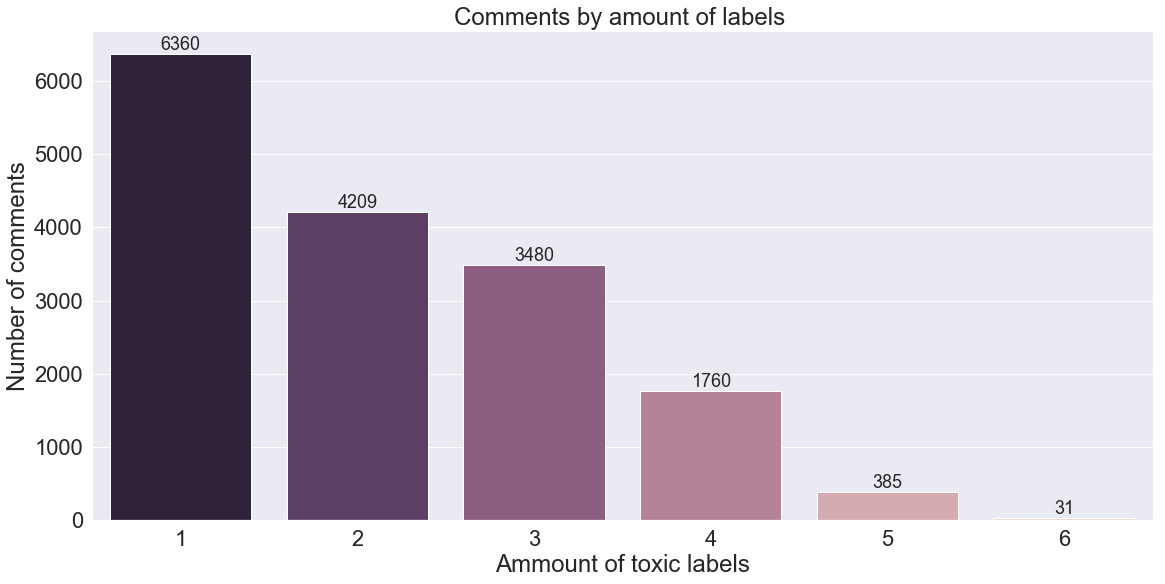

In [10]:
mult_labels = [1,2,3,4,5,6]

plt.figure(figsize=(19,9))
plt.ylabel("Number of comments")
plt.xlabel("Ammount of toxic labels")
plt.title("Comments by amount of labels ")

colors = sns.cubehelix_palette(6, reverse=True) 
ax = sns.barplot( mult_labels,multi_comments[1:],palette=colors)
rects = ax.patches
for rect, label in zip(rects, multi_comments[1:]):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

    In this barplot we can see that only 31 comments are toxic by all types of toxicity,
    while toxic by only one category - 6360 comments.

### Relationship between toxicity type
    Is there is a certain pattern for relationships between toxicity categories?
    For example:Is 'identity_hate' comment always will be 'toxic' comment as well?

In [11]:
toxic_hate = comments_data.loc[(comments_data['toxic'] == 1) & (comments_data['severe_toxic'] == 1)]
print("Ammount of 'toxic' comments:        ",  len(comments_data.loc[comments_data['toxic'] == 1]))
print("Ammount of 'severe_toxic' comments: ",  len(comments_data.loc[comments_data['severe_toxic'] == 1]))
print("Ammount of  comments that are both: ", len(toxic_hate))

Ammount of 'toxic' comments:         15294
Ammount of 'severe_toxic' comments:  1595
Ammount of  comments that are both:  1595


    We can now see that all comments that are 'severe_toxic' are just 'toxic' as well.

In [12]:
toxic_o = comments_data.loc[(comments_data['toxic'] == 1) & (comments_data['obscene'] == 1)]
print("Ammount of 'toxic' comments:        ",  len(comments_data.loc[comments_data['toxic'] == 1]))
print("Ammount of 'obscene' comments:      ",  len(comments_data.loc[comments_data['obscene'] == 1]))
print("Ammount of  comments that are both: ", len(toxic_o))

Ammount of 'toxic' comments:         15294
Ammount of 'obscene' comments:       8449
Ammount of  comments that are both:  7926


    Not all, but a bigger part of 'obscene' comments are 'toxic' as well. This might seem quite logical as the largest ammount  of comments are labeled 'toxic'.
  

   The best fit to display this kind of relations between our comments will be **correlation matrix** . A correlation matrix is a table showing correlation coefficients between sets of variables. Correlation coefficients are used in statistics to measure how strong a relationship is between two variables.

### Visualizing relationship between toxicity type

    Heat map works by correlation, where
    1 - being the most correlated   
    -1 - not correlated at all. 

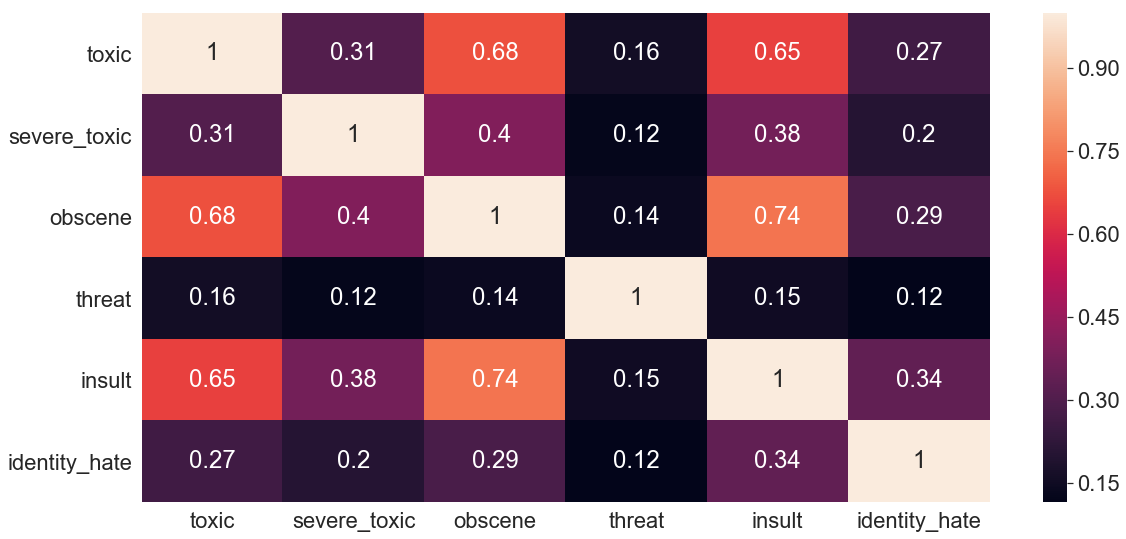

In [13]:
plt.figure(figsize=(19,9))
sns.heatmap(comments_data.iloc[:, [2,3,4,5,6,7]].corr(),annot=True)

    This correlation matrix shows us that the highest correlation scores are
    'toxic' and 'obscene' - 0.74
    'toxic' and 'obscene' - 0.68
    'toxic' and 'insult'  - 0.65
    And which is very surprising 'toxic' and 'severe_toxic' got only 0.31
    
    Why the correlation score for 'toxic' and 'severe_toxic' is so low considering that previously I showed that all comments that are 'severe_toxic' are just 'toxic' as well?
    I think this is linked to the vast difference between amount of 'toxic' and 'severe_toxic' comments. 
    'severe_toxic' are only 10.4% out of all 'toxic' comments. While ,at the same time not being a complete subset, 'obscene' comments are 51.8% of 'toxic' comments.

## Analysing words. Cleaning text.
    Exploring comments with NLTK.
    What words typically represent each category of toxicity? 

In [14]:
threat_comments = comments_data[comments_data['threat'] == 1]

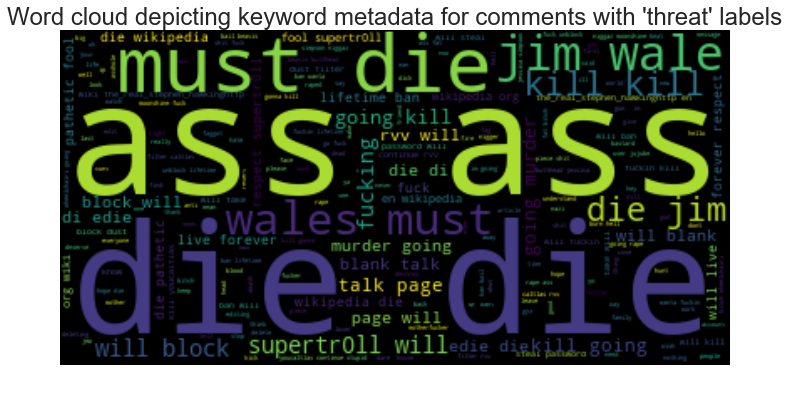

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=(12,8))
text = " ".join(comment for comment in threat_comments.comment_text)
wordcloud = WordCloud(max_words=200,max_font_size=100).generate(text)
plt.title("Word cloud depicting keyword metadata for comments with 'threat' labels")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Tokenization
    Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. It is a common task in Natural Language Processing. "Tokenization" is taking a text or set of text and breaking it up into its individual words. In our case we are splitting each comment into set of words.
### Removing stopwords and punctuation
    Stopword - a word that is automatically omitted from a computer-generated concordance or index.
    The default set of stop-words can be downloaded from NLTK or WordCloud library. As WordCloud's list contains more words and by previous check the final result is higher I am going to use it. I also can update the default list with my own words.
    -tokenizing
    -removing stopwords
    -removing punctuation
    
  **Update:**
     Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word. Stemming follows an algorithm with steps to perform on the words which makes it faster. It was known that I cannot apply stemming to my text as the products (which are not real words) wont be present in the GloVe model. But theoretically I could apply lemmatization, as lemma is an actual language word, thus it will be present in GloVe.
    

In [16]:
#tokenization for all comments in dataset using NLTK
tokens = []
for comment in comments_data['comment_text']:
    nltk_tokens = nltk.word_tokenize(comment)
    tokens.append(nltk_tokens) 

In [17]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stop_words = set(STOPWORDS)

filtered_sent = []
for token_comment in tokens:
    one_comment=[]
    for token in token_comment:
             if token not in stop_words:
                    one_comment.append(lemmatizer.lemmatize(token))                    
    filtered_sent.append(one_comment) 

In [18]:
filtered_comments = []
for comment in filtered_sent:
    comm = ' '.join(comment)
    filtered_comments.append(comm)    

In [19]:
comments_data['filtered'] = filtered_comments
comments_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,filtered
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,d'aww ! match background colour 'm seemingly s...
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,"hey man , 'm really trying edit war . 's guy c..."
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,`` ca n't make real suggestion improvement - w...
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,", sir , hero . chance remember page 's ?"


In [20]:
comments_data['filtered'] = comments_data['filtered'].str.translate(str.maketrans('', '', string.punctuation))
comments_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,filtered
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,daww match background colour m seemingly stuc...
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,hey man m really trying edit war s guy const...
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,ca nt make real suggestion improvement wonde...
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,sir hero chance remember page s


# Modeling
## GloVe
    GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.
    
   **1.   Nearest neighbors**
    
    The Euclidean distance (or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words. Sometimes, the nearest neighbors according to this metric reveal rare but relevant words that lie outside an average human's vocabulary. 
   **2.   Linear substructures**

    The similarity metrics used for nearest neighbor evaluations produce a single scalar that quantifies the relatedness of two words. This simplicity can be problematic since two given words almost always exhibit more intricate relationships than can be captured by a single number. For example, man may be regarded as similar to woman in that both words describe human beings; on the other hand, the two words are often considered opposites since they highlight a primary axis along which humans differ from one another.


    In order to capture in a quantitative way the nuance necessary to distinguish man from woman, it is necessary for a model to associate more than a single number to the word pair. A natural and simple candidate for an enlarged set of discriminative numbers is the vector difference between the two word vectors. GloVe is designed in order that such vector differences capture as much as possible the meaning specified by the juxtaposition of two words.
    
 To upload GloVe I am using Gensim, which is the most robust, efficient and hassle-free piece of software to realize unsupervised semantic modelling from plain text. Gensim designed to work with word2vec vectors, thus we need to convert our GloVe model 'glove.twitter.27B.25d.txt' to word2vec vector format.    

In [21]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath(r'C:\Users\zorya\glove.twitter.27B.25d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

In [22]:
def vectorize(tokens, model):
    vectors = [model[token] for token in tokens if token in model]
    return np.max(vectors, axis=0).flatten() if vectors else np.zeros(model.vector_size)

In [23]:
comments_data['commentsVect'] = comments_data['filtered'].apply(nltk.word_tokenize).apply(vectorize,args=(model,))

## Training

In [24]:
comments_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,filtered,commentsVect
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,explanation edits made username hardcore metal...,"[1.0037, 1.2789, 1.2237, 1.0675, 1.8121, 1.099..."
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,daww match background colour m seemingly stuc...,"[0.46768, 1.0954, 0.87742, 0.16834, 1.3022, 0...."
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,hey man m really trying edit war s guy const...,"[1.0727, 1.329, 1.2237, 1.0445, 1.1874, 0.5940..."
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,ca nt make real suggestion improvement wonde...,"[1.529, 1.5039, 1.7773, 0.34798, 1.1148, 1.025..."
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,sir hero chance remember page s,"[0.71211, 0.76789, 0.55827, 0.19608, 0.99077, ..."


    I am using a three step approach for this project:
        -pretrained word to vector model(GloVe)
        -label transformation(LabelPowerset)
        -classification
 ## Multi-label classification
   In this case I have to work with **multi-label classification** as the comment can belong to more than one label simultaneously. For example the 7th comment is toxic, severe_toxic, obscene and insult at the same time.  
   
   Nowadays, multi-label classification methods are increasingly required by modern applications.
   In multi-label classification, the examples are associated with a set of labels *Y ⊆ L*. As opposite to traditional single-label classification, where learning is done from a set of examples that are associated with a single label  *l  from a set of disjoint labels L, |L| > 1*. 
   Text documents usually belong to more than one conceptual class.

       Two main methods for multi-label classification: 
       a) problem transformation methods
           methods that transform the multi-label classification problem 
           either into one or more single-label classification or regression problems;
       b) algorithm adaptation methods
           methods that extend specific learning algorithms in order to handle 
           multi-label data directly
   LabelPowerset convert multi-label to multi-class, meaning it is a problem transformation method. It is the most basic approache for multilabel classification task.
   LP considers the multi-class problem of predicting each member of the powerset of L that exists in the training set. 
   It has the advantage of taking label correlations into account(which in my opnion is very relevant to our case), but suffers from the large number of label subsets, the majority of which are associated with very few examples

## Training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(comments_data['commentsVect'],
                                                    comments_data [ ['toxic'  ,'severe_toxic' ,  'obscene' , 'threat' ,'insult','identity_hate' ] ] ,
                                                    random_state=42, test_size=0.30, shuffle=True)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(47872,)
(111699,)
(47872, 6)
(111699, 6)


In [26]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import BinaryRelevance


from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

X_train =np.array(X_train.values.tolist())
clr = RandomForestClassifier(n_estimators=100)
clr.fit(X_train, y_train)

C:\Users\zorya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
X_test =np.array(X_test.values.tolist()) 
predictions = clr.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,predictions)*100)
print("Hamming loss = ",hamming_loss(y_test,predictions) *100)
print("Log loss = ",log_loss(y_test,predictions))

Accuracy =  90.36179812834224
Hamming loss =  2.628189059714795
Log loss =  1.4877271630919167


In [28]:
clf = LabelPowerset(classifier = RandomForestClassifier(n_estimators=100),require_dense = [False, True])
clf.fit(X_train, y_train)

LabelPowerset(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       require_dense=[False, True])

In [29]:
predictions_LP = clf.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,predictions_LP)*100)
print("Hamming loss = ",hamming_loss(y_test,predictions_LP) *100)

Accuracy =  90.63335561497327
Hamming loss =  2.8604055258467023


In [103]:
print("Shape: ",predictions.shape)

Shape:  (47872, 6)
